# Movies Data Analysis Project

## Introduction

Leveraging a detailed dataset from Kaggle, this project aims to uncover trends and patterns in the world of cinema through the analysis of various movie features. The dataset encompasses a rich array of attributes, each offering a unique lens to evaluate a movie's success and appeal:

- **Name**: The title of the movie.
- **Rating**: The classification indicating the appropriateness of the content for different age groups.
- **Genre**: The thematic category of the movie.
- **Year**: The year of release.
- **Released**: The specific release date.
- **Score**: The critical reception score.
- **Votes**: The number of audience votes.
- **Director**: The individual steering the movie's direction.
- **Writer**: The creator of the movie's script.
- **Star**: The lead actors.
- **Country**: The production geography.
- **Budget**: The financial outline.
- **Gross**: The total revenue generated.
- **Company**: The production company.
- **Runtime**: The duration of the movie.

Our objective is to identify the intricate relationships between these features and to understand their role in a movie's success, providing a data-driven narrative for cinema enthusiasts and industry insiders alike.



In [6]:
#Import Libraries

import pandas as pd 
import seaborn as sns 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)#adjust the configurations for hte plots we will create 

# read in the data 
df = pd.read_csv(r'C:\Users\Owner\OneDrive\Pictures\Documents\DataAnalystPortfolio\movies.csv')


In [7]:
#viewing data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
# checking for percentage missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-1.004173187271779%
genre-0.0%
year-0.0%
released-0.02608242044861763%
score-0.03912363067292645%
votes-0.03912363067292645%
director-0.0%
writer-0.03912363067292645%
star-0.013041210224308816%
country-0.03912363067292645%
budget-28.31246739697444%
gross-2.464788732394366%
company-0.2217005738132499%
runtime-0.05216484089723526%


In [9]:
# checking data types for all columns 

df.dtypes 


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Cleaning dataset

To ensure the robustness of our analysis, it is imperative to address the presence of null values in the dataset. My strategy involves:

- **Text Columns**: Replacing null values with the most frequent data point (mode) to maintain the general trend in the data.
- **Numerical Columns**: Substituting null values with the mean of the respective column to preserve the central tendency.

This approach is designed to prevent potential errors and discrepancies in the later stages of the analysis


In [10]:

# Replace missing values in 'rating' column with the mode (most frequent value)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Replace missing values in 'released' column with the most frequent value
df['released'].fillna(df['released'].mode()[0], inplace=True)

# Replace missing values in 'score' column with the median
df['score'].fillna(df['score'].median(), inplace=True)

# Replace missing values in 'votes' column with the median
df['votes'].fillna(df['votes'].median(), inplace=True)

# Replace missing values in 'writer' column with the most frequent value
df['writer'].fillna(df['writer'].mode()[0], inplace=True)

# Replace missing values in 'star' column with the most frequent value
df['star'].fillna(df['star'].mode()[0], inplace=True)

# Replace missing values in 'country' column with the most frequent value
df['country'].fillna(df['country'].mode()[0], inplace=True)

# Replace missing values in 'budget' column with the median
df['budget'].fillna(df['budget'].median(), inplace=True)

# Replace missing values in 'gross' column with the median
df['gross'].fillna(df['gross'].median(), inplace=True)

# Replace missing values in 'company' column with the most frequent value
df['company'].fillna(df['company'].mode()[0], inplace=True)

# Replace missing values in 'runtime' column with the median
df['runtime'].fillna(df['runtime'].median(), inplace=True)



In [7]:
#checking again to see if there are still nulls

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.0%
genre-0.0%
year-0.0%
released-0.0%
score-0.0%
votes-0.0%
director-0.0%
writer-0.0%
star-0.0%
country-0.0%
budget-0.0%
gross-0.0%
company-0.0%
runtime-0.0%


In [11]:
#changing data type of some column to remove unnessecary decimal  

df['budget']=df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime']=df['runtime'].astype('int64')

In [12]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,20205757,Universal Pictures,90
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000,20205757,Cactus Blue Entertainment,90
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,20205757,Embi Productions,104
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000,James Randall,James Randall,Christina Roz,United States,15000,20205757,Universal Pictures,120


### Creating a  new year Column

During the initial stages of data exploration, I identified inconsistencies in the original 'year' column, which prompted a deeper investigation into the accuracy of the dataset.

To rectify this, I decided to extract the accurate release year from the 'released' column, which contains detailed information on the release date of each movie. This approach ensures that my analyses are based on precise and reliable data, enhancing the validity of the conclusions drawn.



In [13]:
# Extracting the release year from the 'released' column, storing it in 'year_extracted'
df['year_extracted'] = df['released'].str.extract('(\d{4})')
#setting the year extracted column to int since it was extracted from an object ty column
df['year_extracted']=df['year_extracted'].astype('int64')
pd.set_option('display.max_rows', None)

In [14]:
pd.reset_option('display.max_rows')

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.0%
genre-0.0%
year-0.0%
released-0.0%
score-0.0%
votes-0.0%
director-0.0%
writer-0.0%
star-0.0%
country-0.0%
budget-0.0%
gross-0.0%
company-0.0%
runtime-0.0%
year_extracted-0.0%


In [28]:
#Droping any duplicates 
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_extracted
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,20205757,Universal Pictures,90,2020
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000,20205757,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,20205757,Embi Productions,104,2020
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000,James Randall,James Randall,Christina Roz,United States,15000,20205757,Universal Pictures,120,2020


### Analyzing the Relationship between Budget and Gross Earnings

In this section, I am exploring the potential correlation between a movie's budget and its gross earnings. A strong correlation between these variables might indicate that higher budgets often lead to higher earnings, which would be a significant insight into the financial dynamics of the film industry.

I am using a scatter plot to visualize this relationship, with the x-axis representing the gross earnings and the y-axis representing the budget. The scatter plot will help in visually assessing whether an increase in the budget is generally accompanied by an increase in gross earnings, indicating a positive correlation.


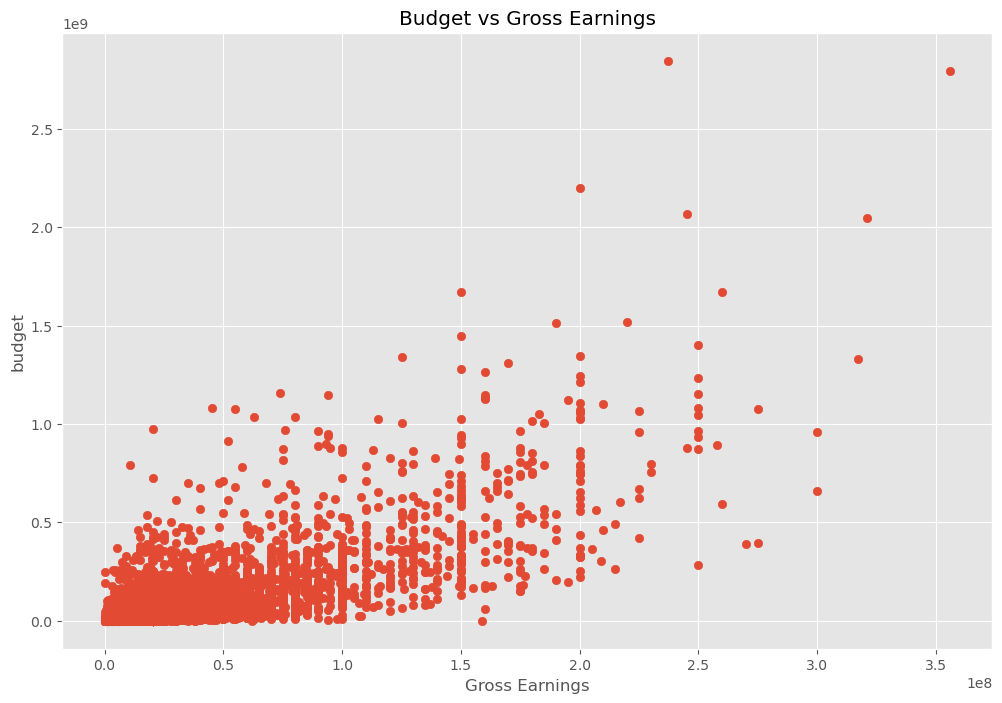

In [15]:
# Checking if Budget has high correlation to gross 

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('budget')
plt.show()


### Visualizing the Trend between Budget and Gross Earnings with a Regression Plot

In this section, I am delving deeper into the relationship between a movie's budget and its gross earnings by creating a regression plot using the Seaborn library. This plot will not only display individual data points (as a scatter plot) but also fit a regression line to the data, helping to visually identify any underlying trend.

I chose to highlight the data points in yellow and the regression line in black to ensure clear visibility and distinction between the individual data points and the trend line.

By analyzing the regression plot, I aim to identify whether there is a noticeable trend that indicates a correlation between the budget and gross earnings, providing a more grounded understanding of how budget allocations can influence a movie's financial success.



Text(0.5, 1.0, 'Budget vs Gross Earnings')

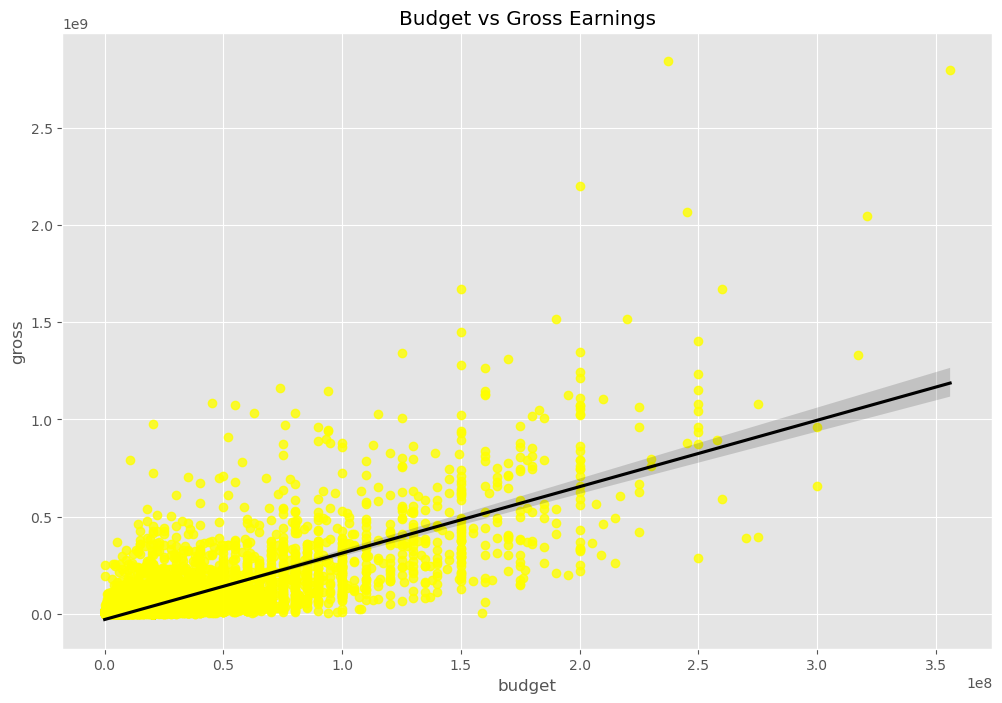

In [16]:
#doing a regression plot to show trend with seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"yellow"}, line_kws={"color":"black"})
plt.title('Budget vs Gross Earnings')

### Insights on Gross Revenue and Budget Correlation
The plot above illustrates a positive correlation between a movie's budget and its gross revenue, indicating that higher investments often yield greater returns. This trend can be attributed to potential benefits such as improved production quality, enhanced marketing strategies, and the ability to secure high-profile cast members.

However, it is critical to remember that a larger budget doesn't guarantee success, as other elements like storyline and audience reception are pivotal. Future analyses will delve deeper into this correlation, considering various other factors to offer a comprehensive understanding of what drives a movie's financial success.

In [31]:
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime,year_extracted
year,1.000000,0.098013,0.222573,0.291690,0.259504,0.120662,0.996802
score,0.098013,1.000000,0.409157,0.061931,0.185563,0.399407,0.106221
votes,0.222573,0.409157,1.000000,0.460968,0.632120,0.309151,0.217995
budget,0.291690,0.061931,0.460968,1.000000,0.745881,0.273371,0.284125
gross,0.259504,0.185563,0.632120,0.745881,1.000000,0.244380,0.252759
runtime,0.120662,0.399407,0.309151,0.273371,0.244380,1.000000,0.120573
year_extracted,0.996802,0.106221,0.217995,0.284125,0.252759,0.120573,1.000000


### Creating a Correlation Matrix for Numeric Features

In this step, I am generating a correlation matrix to visualize the relationships between the numeric features in the dataset more clearly. Utilizing Seaborn's heatmap function allows me to represent the correlation coefficients graphically, offering a quick way to identify strongly correlated features at a glance.

The annotations on the heatmap provide the exact correlation values, facilitating a precise understanding of the relationships between different numeric features.


<function matplotlib.pyplot.show(close=None, block=None)>

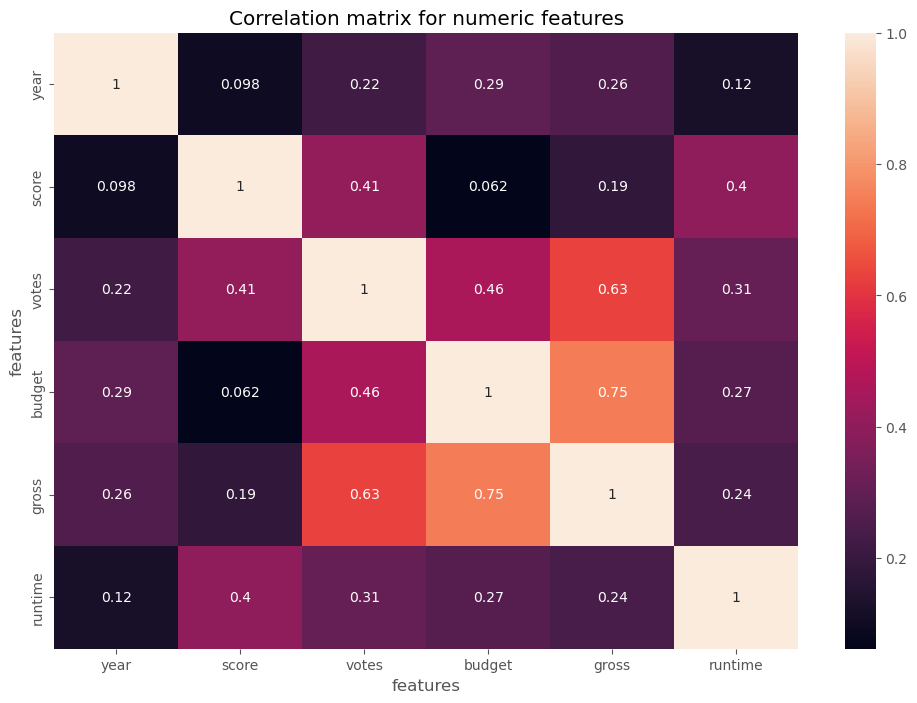

In [93]:
#creating correlation matrix to better visualize correlations 

correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('features')
plt.ylabel('features')
plt.show

### Visualizing the Correlation between Votes and Gross Revenue

After analyzing the correlation matrix, I noticed a substantial positive correlation of 0.63 between the number of votes a movie receives and its gross revenue. This suggests that movies with higher gross revenues tend to receive more votes.

To delve deeper into this relationship, I decided to create a scatter plot with a regression line to visualize this correlation. The scatter plot will have the gross revenue on the Y-axis and the number of votes on the X-axis. 

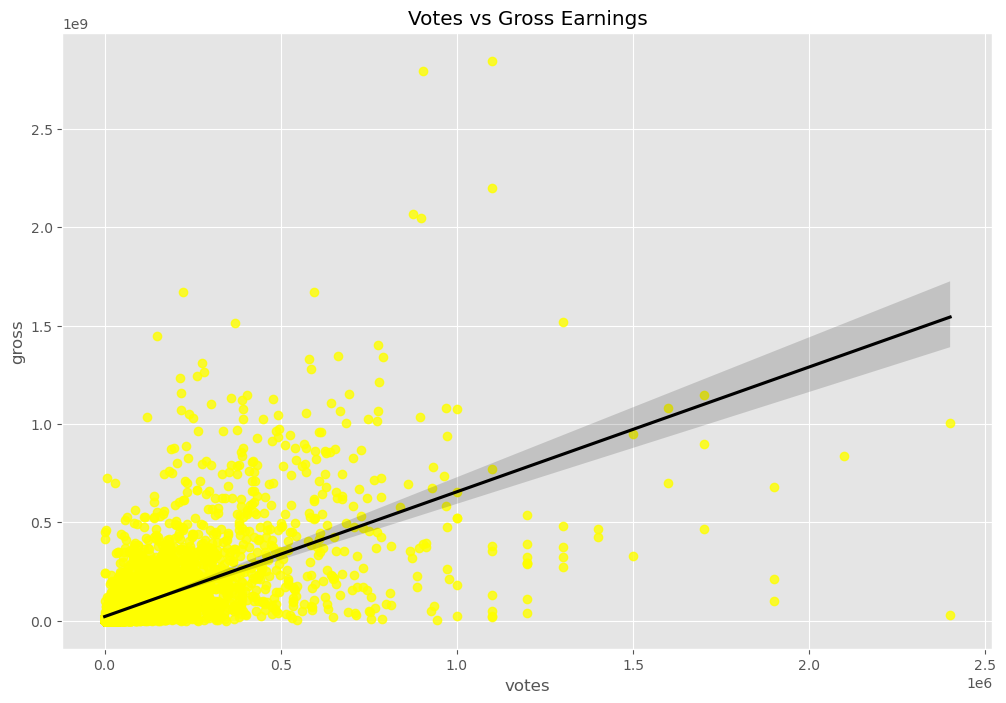

In [17]:
# Visualizing the Correlation between Votes and Gross Revenue
sns.regplot(x='votes', y='gross', data=df, scatter_kws={"color":"yellow"}, line_kws={"color":"black"})
plt.title('Votes vs Gross Earnings')
plt.show()

### Insights into the Positive Correlation between Votes and Gross Revenue

Observing a positive correlation of 0.63 between votes and gross revenue suggests that movies which garner higher revenues tend to receive more votes. This could be attributed to a larger audience base and a higher engagement rate with successful movies. Moreover, successful movies often create a buzz, encouraging more viewers to vote. It reflects a general trend where financial success often brings in more audience interaction and engagement, creating a virtuous cycle of popularity and revenue.


## Exploring the Relationship Between Production Companies and Gross Revenue

In this segment of our analysis, we are focusing on understanding the intricate relationship between production companies and the gross revenue generated by the movies they produced. we will only be looking at top 50 companies that appear the most in this dataset. The central questions guiding this analysis are:

1. **Do established production companies consistently generate higher gross revenues?**
2. **Are there lesser-known production companies that have managed to rake in substantial revenues?**
3. **What is the variability in the gross revenues among the top production companies?**




In [19]:
# Retrieving and printing the top 50 companies based on their appearance count in the dataset
company_appearances = df['company'].value_counts().head(50)
print(company_appearances.to_string())


Universal Pictures                         394
Warner Bros.                               334
Columbia Pictures                          332
Paramount Pictures                         320
Twentieth Century Fox                      240
New Line Cinema                            174
Touchstone Pictures                        132
Metro-Goldwyn-Mayer (MGM)                  125
Walt Disney Pictures                       123
TriStar Pictures                            94
Dreamworks Pictures                         76
Miramax                                     74
Fox 2000 Pictures                           63
Orion Pictures                              60
Summit Entertainment                        60
Castle Rock Entertainment                   59
Lionsgate                                   58
Fox Searchlight Pictures                    57
Dimension Films                             56
Screen Gems                                 56
Hollywood Pictures                          49
Focus Feature

### Top 50 Companies Analysis
In this part of our analysis, we analyse the top 50 frequently appearing companies in our dataset. The script operates as follows:

Selection of Top 50 Companies: Using the value_counts() method, we pinpoint the top 50 companies based on their frequency in the dataset.

Data Grouping: The data is filtered to retain only the records of the top 50 companies, followed by grouping based on the 'company' column.

Metric Calculation: We derive two key metrics for each company:

Average Budget: The mean budget for all the company's movies.
Average Gross: The mean gross revenue for all the company's movies.
Result Presentation: The structured data, sans index, is displayed to showcase each company's average budget and gross revenue, setting the stage for deeper analysis.


In [20]:
# Get the top 50 companies by appearance count
top_50_companies = df['company'].value_counts().head(50).index.tolist()

# Group the data by 'company' and calculate the mean budget and gross for each company
company_stats = df[df['company'].isin(top_50_companies)].groupby('company').agg(
    appearance_count=('company', 'count'),
    average_budget=('budget', 'mean'),
    average_gross=('gross', 'mean'),
).reset_index()

# Display the stats for each of the top 50 companies
print(company_stats.to_string(index=False))



                                company  appearance_count  average_budget  average_gross
                    Alcon Entertainment                26    4.186538e+07   8.097094e+07
                              BBC Films                32    1.520938e+07   1.437224e+07
                              CBS Films                19    2.078947e+07   5.733085e+07
                                 Canal+                18    2.208333e+07   3.537358e+07
                       Carolco Pictures                25    3.112000e+07   7.280695e+07
              Castle Rock Entertainment                59    3.316102e+07   4.696403e+07
                     Channel Four Films                19    1.722105e+07   5.161271e+06
                      Columbia Pictures               332    4.857562e+07   1.295450e+08
De Laurentiis Entertainment Group (DEG)                17    1.151765e+07   9.570008e+06
                        Dimension Films                56    2.717321e+07   6.483278e+07
             Dino De 

### Adding together duplicate companies

In the step below, we are enhancing our analysis by grouping similar or related companies under a common name to take out duplicates that could affect our analysis



In [21]:
#Create a mapping dictionary to group companies under a common name
company_name_mapping = {
    "Walt Disney Pictures": "Disney",
    "Walt Disney Animation Studios": "Disney",
    "Dreamworks Pictures": "DreamWorks",
    "DreamWorks Animation": "DreamWorks",
    "PolyGram Filmed Entertainment":"Polygram Filmed Entertainment",
    "Fox 2000 Pictures": "Twentieth Century Fox",
    "Fox Searchlight Pictures": "Twentieth Century Fox"
}

#Create a new column with the grouped company names
df['grouped_company'] = df['company'].replace(company_name_mapping)

#Get the top 50 companies by appearance count using the grouped company names
top_50_companies = df['grouped_company'].value_counts().head(50).index.tolist()

#Group the data by 'grouped_company' and calculate the mean budget and gross for each grouped company
company_stats = df[df['grouped_company'].isin(top_50_companies)].groupby('grouped_company').agg(
    appearance_count=('grouped_company', 'count'),
    average_budget=('budget', 'mean'),
    average_gross=('gross', 'mean')
).reset_index()

#Display the stats for each of the top 50 grouped companies
print(company_stats.to_string(index=False))

                        grouped_company  appearance_count  average_budget  average_gross
                    Alcon Entertainment                26    4.186538e+07   8.097094e+07
                              BBC Films                32    1.520938e+07   1.437224e+07
                              CBS Films                19    2.078947e+07   5.733085e+07
                                 Canal+                18    2.208333e+07   3.537358e+07
                       Caravan Pictures                15    2.983333e+07   3.239525e+07
                       Carolco Pictures                25    3.112000e+07   7.280695e+07
              Castle Rock Entertainment                59    3.316102e+07   4.696403e+07
                     Channel Four Films                19    1.722105e+07   5.161271e+06
                      Columbia Pictures               332    4.857562e+07   1.295450e+08
De Laurentiis Entertainment Group (DEG)                17    1.151765e+07   9.570008e+06
                     

### Company vs Gross Revenue Plot

In the plot below, we visualize the average gross revenue of the top 50 film companies in our dataset. The companies are displayed along the x-axis, and their respective average gross revenues are displayed along the y-axis, measured in millions of USD.

Each bar represents a company, and the height of the bar indicates the average gross revenue that the company's films have generated. The data is derived from the `grouped_company` and `average_gross` columns of our `company_stats_sorted` dataframe, which groups companies by common names and calculates the mean gross revenue for each group.

This visualization aids in quickly identifying which companies, on average, generate the most revenue from their films. 

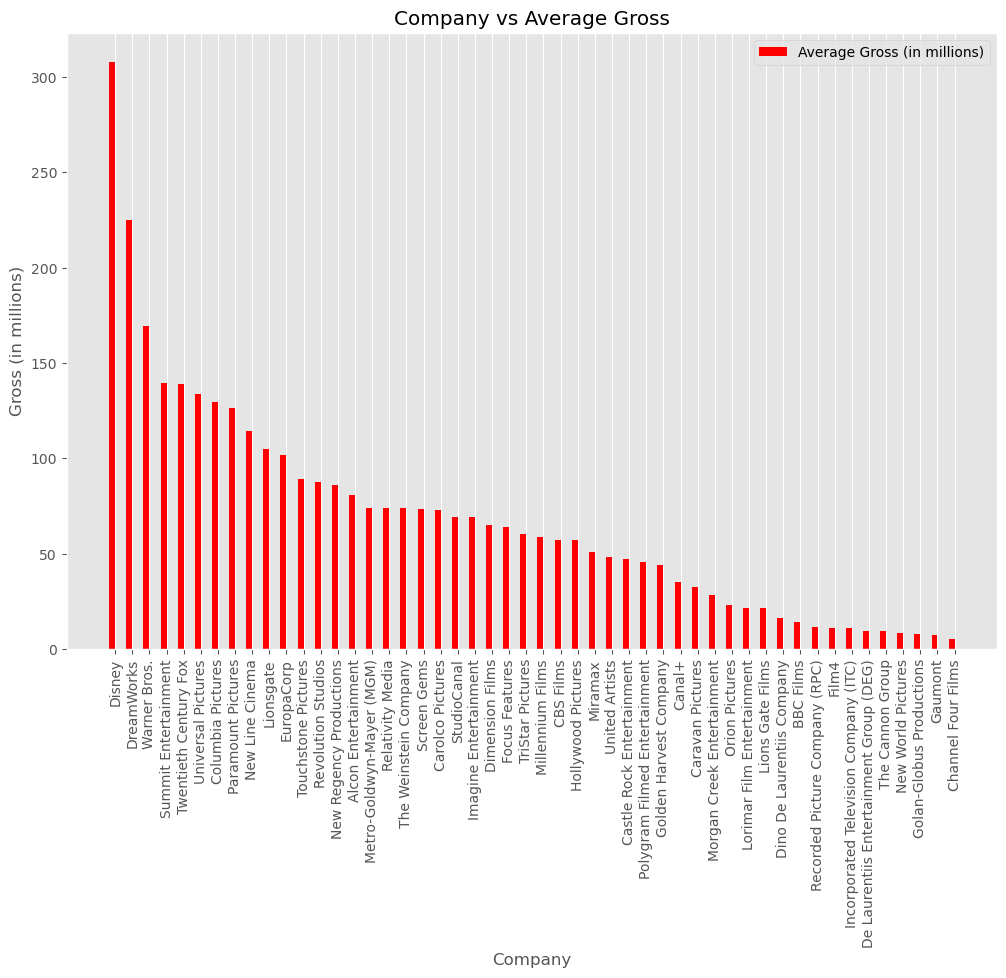

In [22]:
import matplotlib.pyplot as plt

# Sort the company_stats DataFrame by average_gross in descending order
company_stats_sorted = company_stats.sort_values(by='average_gross', ascending=False)

# Set the positions and width for the bars
pos = list(range(len(company_stats_sorted['grouped_company'])))
bar_width = 0.35

# Set the figure size
plt.figure(figsize=(12,8))

# Create bars for average_gross
plt.bar(pos, company_stats_sorted['average_gross']/1e6, bar_width, color='red', label='Average Gross (in millions)')

# Set the labels, title, and custom x-axis tick labels
plt.ylabel('Gross (in millions)')
plt.xlabel('Company')
plt.title('Company vs Average Gross')
plt.xticks([p + bar_width/2 for p in pos], company_stats_sorted['grouped_company'], rotation=90)
plt.grid(axis='y')

# Adding legend
plt.legend()

# Show the plot
plt.show()


### Company vs Gross Revenue Analysis

The plot above illustrates the average gross revenue generated by the top film production companies. Unsurprisingly, industry giants such as Disney, DreamWorks, Warner Bros, and Twentieth Century Fox lead in revenue generation, a testament to their established reputation and wide audience reach.

However, gross revenue is not a standalone metric; it is influenced by various factors including the production budget. A substantial budget can potentially enhance a movie's quality, thereby attracting larger audiences and increasing revenue.

In the subsequent analysis, we will delve deeper by comparing the average budget against the gross revenue to furnish a more rounded view of a company's financial dynamics in the film industry.


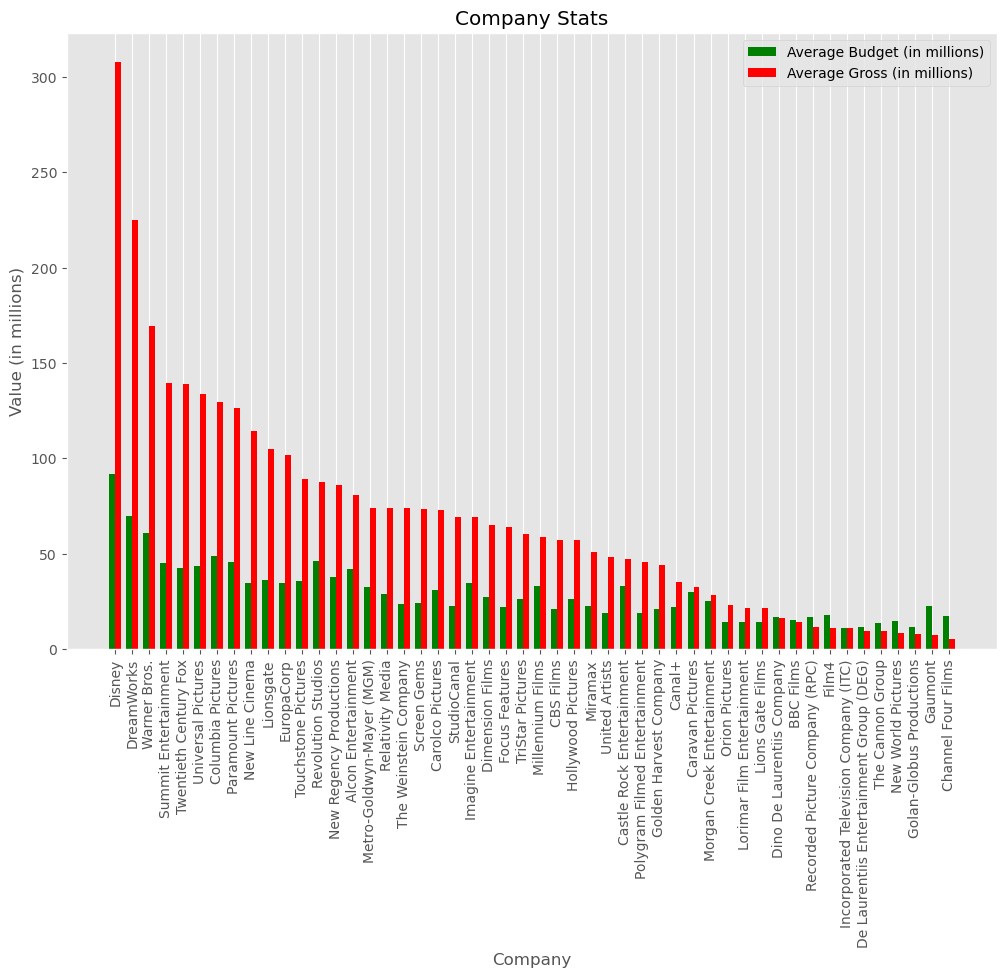

In [23]:


# Set the positions and width for the bars
pos = list(range(len(company_stats_sorted['grouped_company'])))
bar_width = 0.35

# Set the figure size
plt.figure(figsize=(12,8))

# Create bars for average_budget and average_gross
plt.bar(pos, company_stats_sorted['average_budget']/1e6, bar_width, color='green', label='Average Budget (in millions)')
plt.bar([p + bar_width for p in pos], company_stats_sorted['average_gross']/1e6, bar_width, color='red', label='Average Gross (in millions)')

# Set the labels, title, and custom x-axis tick labels
plt.ylabel('Value (in millions)')
plt.xlabel('Company')
plt.title('Company Stats')
plt.xticks([p + bar_width/2 for p in pos], company_stats_sorted['grouped_company'], rotation=90)
plt.grid(axis='y')

# Adding legend
plt.legend()

# Show the plot
plt.show()


## Budget and Gross per Company Analysis

 Looking at the bar chart above, we can observe a general correlation between the budget and gross revenue of each company. Generally, the more a company spends on a movie, the more revenue they generate. This is not surprising, as we have previously identified a positive correlation between the budget allocated to a movie and its gross revenue. However, it is evident that there are clear outliers; some companies achieve significant gross revenue despite not having the highest budgets.

 To further investigate these outliers, we will introduce a new variable called "gross per budget." This metric will serve as a measure of a company's efficiency in generating gross revenue, calculated by dividing the gross revenue by the budget. By analyzing this metric, we can delve deeper into understanding company efficiency and identifying the factors that might drive higher production efficiency.


In [26]:
# Create a new column 'gross_per_budget' to represent the gross revenue per unit of budget
company_stats['gross_per_budget'] = company_stats['average_gross'] / company_stats['average_budget']

# Display the updated DataFrame to verify the new column
print(company_stats.to_string(index=False))

                        grouped_company  appearance_count  average_budget  average_gross  gross_per_budget
                    Alcon Entertainment                26    4.186538e+07   8.097094e+07          1.934079
                              BBC Films                32    1.520938e+07   1.437224e+07          0.944959
                              CBS Films                19    2.078947e+07   5.733085e+07          2.757686
                                 Canal+                18    2.208333e+07   3.537358e+07          1.601823
                       Caravan Pictures                15    2.983333e+07   3.239525e+07          1.085874
                       Carolco Pictures                25    3.112000e+07   7.280695e+07          2.339555
              Castle Rock Entertainment                59    3.316102e+07   4.696403e+07          1.416242
                     Channel Four Films                19    1.722105e+07   5.161271e+06          0.299707
                      Columbia Pictur

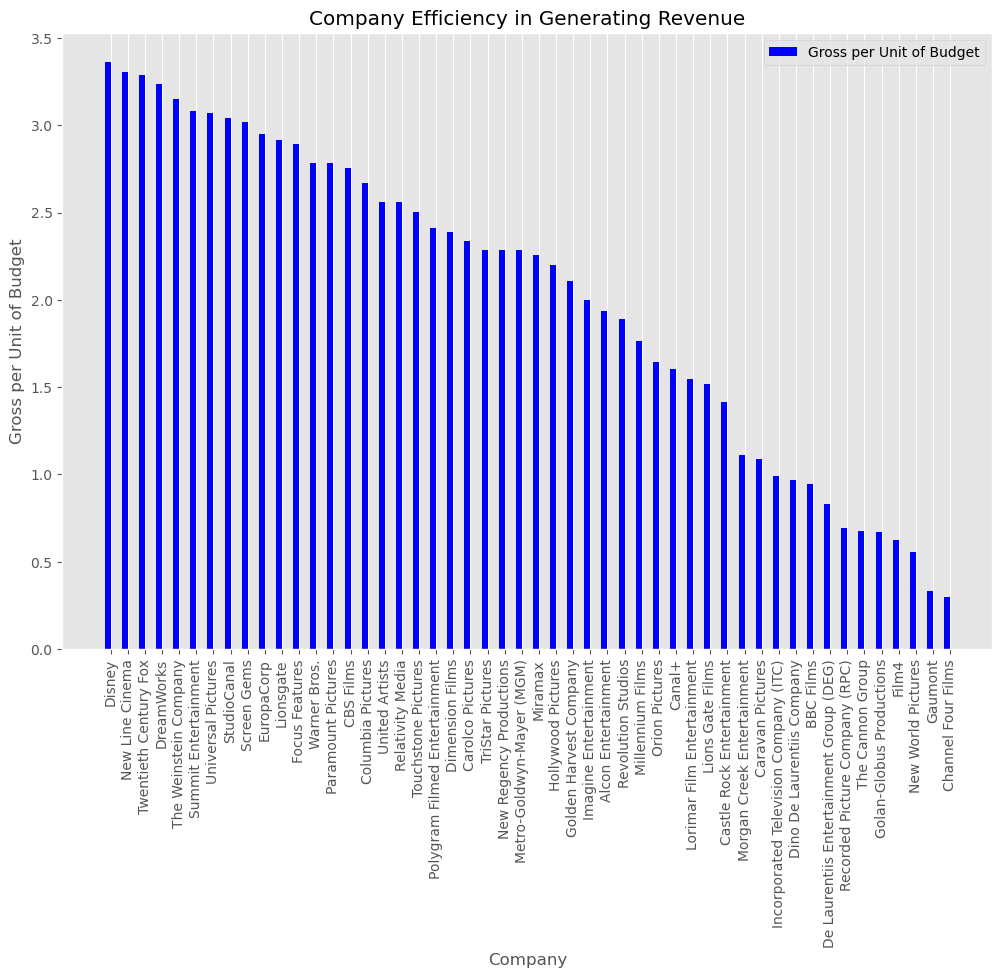

In [27]:

# Sort the data by 'gross_per_budget' in descending order
company_stats_sorted = company_stats.sort_values(by='gross_per_budget', ascending=False)

# Set the positions and width for the bars
pos = list(range(len(company_stats_sorted['grouped_company'])))
bar_width = 0.35

# Set the figure size
plt.figure(figsize=(12,8))

# Create bars for gross_per_budget
plt.bar(pos, company_stats_sorted['gross_per_budget'], bar_width, color='blue', label='Gross per Unit of Budget')

# Set the labels, title, and custom x-axis tick labels
plt.ylabel('Gross per Unit of Budget')
plt.xlabel('Company')
plt.title('Company Efficiency in Generating Revenue')
plt.xticks([p + bar_width/2 for p in pos], company_stats_sorted['grouped_company'], rotation=90)
plt.grid(axis='y')

# Adding legend
plt.legend()

# Show the plot
plt.show()


### **Company Efficiency Analysis**

Looking at the bar chart above, we have "Gross per Budget" on the y-axis and the companies on the x-axis. As we can observe, some companies that were not generating the most gross revenue in our previous chart are now among the leaders in gross generating efficiency; they derive more value from their budget. In the following section, we will examine this metric in comparison to gross revenue and budget.


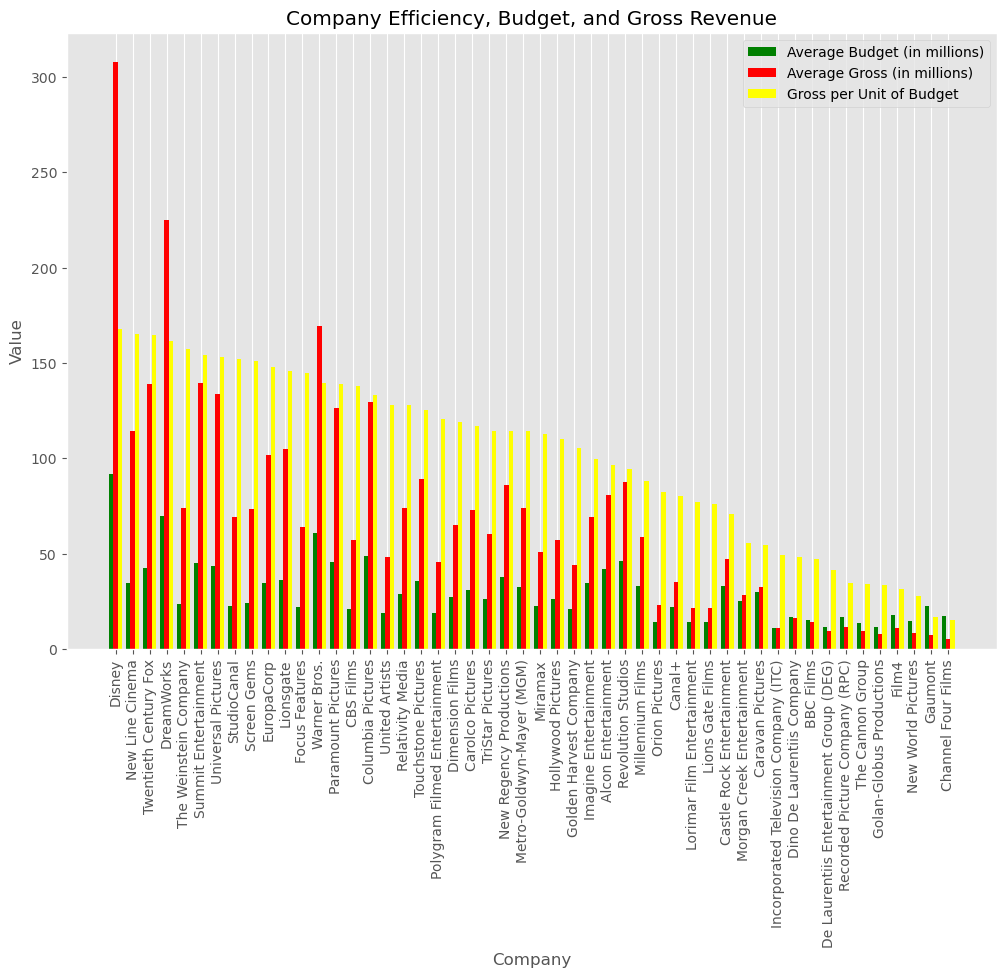

In [28]:


# Sort the data by 'gross_per_budget' in descending order
company_stats_sorted = company_stats.sort_values(by='gross_per_budget', ascending=False)

# Set the positions and width for the bars
pos = list(range(len(company_stats_sorted['grouped_company'])))
bar_width = 0.25

# Set the figure size
plt.figure(figsize=(12,8))

# Create bars for average_budget, average_gross, and gross_per_budget
plt.bar(pos, company_stats_sorted['average_budget']/1e6, bar_width, color='green', label='Average Budget (in millions)')
plt.bar([p + bar_width for p in pos], company_stats_sorted['average_gross']/1e6, bar_width, color='red', label='Average Gross (in millions)')
plt.bar([p + bar_width*2 for p in pos], company_stats_sorted['gross_per_budget']*50, bar_width, color='yellow', label='Gross per Unit of Budget')

# Set the labels, title, and custom x-axis tick labels
plt.ylabel('Value')
plt.xlabel('Company')
plt.title('Company Efficiency, Budget, and Gross Revenue')
plt.xticks([p + bar_width for p in pos], company_stats_sorted['grouped_company'], rotation=90)
plt.grid(axis='y')

# Adding legend
plt.legend()

# Show the plot
plt.show()


### **Company Efficiency Analysis**

Looking at the chart above, we can observe that some companies, not renowned for generating the highest gross revenue or allocating the largest budgets, boast some of the greatest revenue-generating efficiencies. Taking "New Line Cinema" as a case in point, they operate with one of the lowest budgets in the industry, yet they secure a remarkably high gross in comparison. What underlies this phenomenon? What factors determine high company efficiency and low company efficiency? We will delve deeper into this in the next step of our analysis.


In [29]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_extracted,grouped_company
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,Warner Bros.
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,Columbia Pictures
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,Lucasfilm
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,Paramount Pictures
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,Orion Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,20205757,Universal Pictures,90,2020,Universal Pictures
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000,20205757,Cactus Blue Entertainment,90,2020,Cactus Blue Entertainment
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,20205757,Embi Productions,104,2020,Embi Productions
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000,James Randall,James Randall,Christina Roz,United States,15000,20205757,Universal Pictures,120,2020,Universal Pictures


### Breaking down our analysis by considering genre
In this part of the analysis, we will take a look at the distribution of genre for each company and how this affects their gross revenue and budget. once again we will only be looking at the top 50 companies with the most instances in the dataset. 

In [30]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Filter the dataframe to include only rows where the company is in the top 50 companies
df_top_50 = df[df['grouped_company'].isin(top_50_companies)]

# Get the count of each genre for each of the top 50 companies
genre_company_counts = df_top_50.groupby('grouped_company')['genre'].value_counts()

# Print the resulting series to see the count of each genre for each of the top 50 companies
print(genre_company_counts)

# Reset the display option to the default setting after printing
pd.reset_option('display.max_rows')


grouped_company                          genre    
Alcon Entertainment                      Comedy         9
                                         Action         6
                                         Drama          4
                                         Biography      3
                                         Horror         2
                                         Adventure      1
                                         Crime          1
BBC Films                                Drama         16
                                         Biography      7
                                         Comedy         7
                                         Action         1
                                         Crime          1
CBS Films                                Comedy         6
                                         Action         5
                                         Drama          4
                                         Biography      2
                     


In this script, we are visualizing the distribution of different movie genres produced by the top 50 companies.

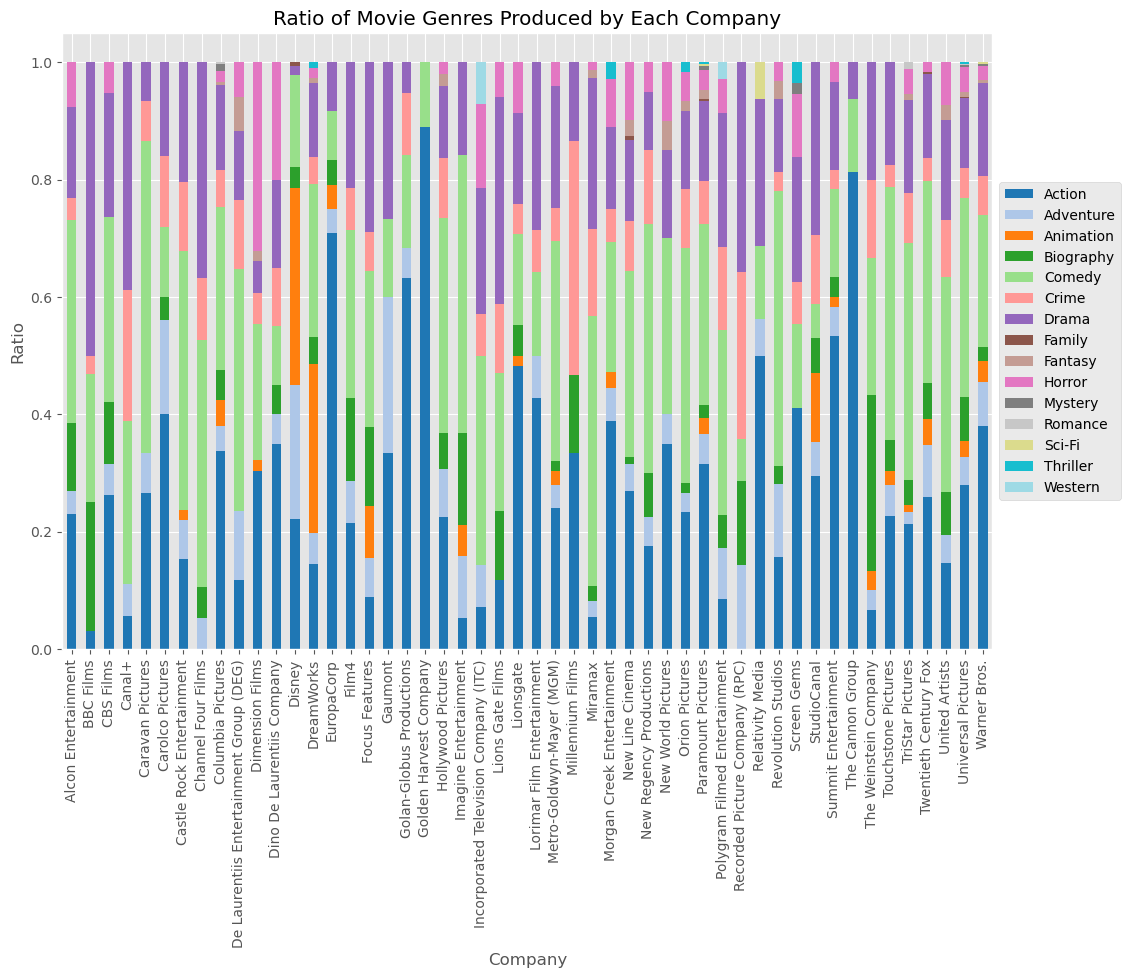

In [31]:

# Get the count of each genre for each of the top 50 companies
genre_company_counts = df_top_50.groupby('grouped_company')['genre'].value_counts().unstack().fillna(0)

# Get the total number of movies produced by each company
total_movies = genre_company_counts.sum(axis=1)

# Get the ratio of each genre
genre_ratios = genre_company_counts.divide(total_movies, axis=0)

# Plot a stacked bar chart
ax = genre_ratios.plot(kind='bar', stacked=True, figsize=(12,8), cmap='tab20')

# Set the labels and title
plt.ylabel('Ratio')
plt.xlabel('Company')
plt.title('Ratio of Movie Genres Produced by Each Company')

# Adding legend
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.show()


### Genre distribution data 
The visualization above shows a destribution of genres per company, and based on quick view we can see that action movies are the most popular genre followed closely by comedy. In the next step of our analysis we will try to visualize what genres drive a higher company effieciency, gross and budget

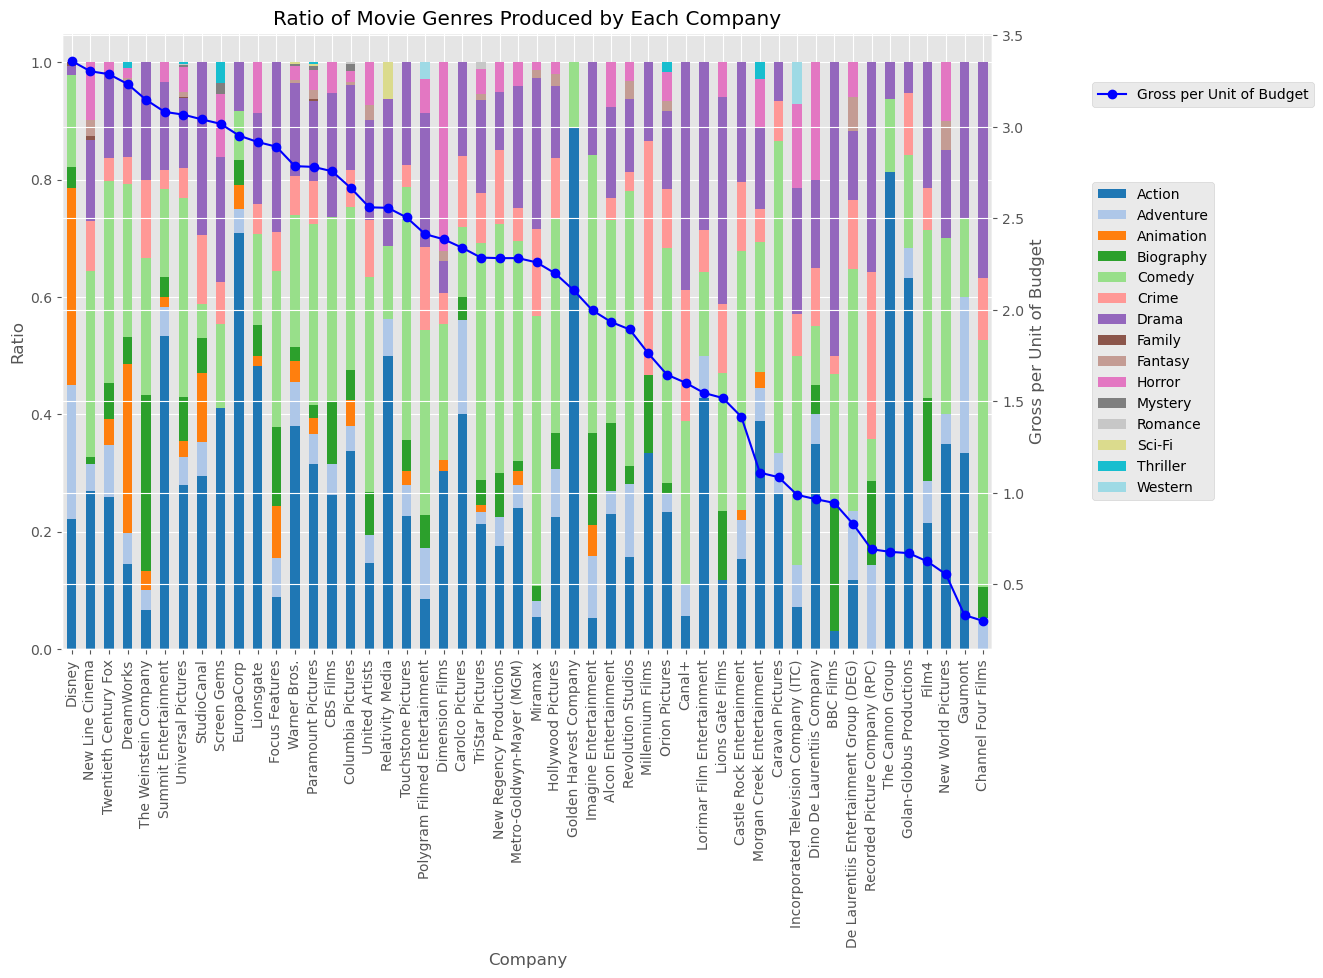

In [32]:

# Sort the data by 'gross_per_budget' in descending order
company_stats_sorted = company_stats.sort_values(by='gross_per_budget', ascending=False)

# Get the count of each genre for each of the top 50 companies
genre_company_counts = df_top_50.groupby('grouped_company')['genre'].value_counts().unstack().fillna(0)

# Get the total number of movies produced by each company
total_movies = genre_company_counts.sum(axis=1)

# Get the ratio of each genre
genre_ratios = genre_company_counts.divide(total_movies, axis=0)

# Get the sorted order of companies by 'gross_per_budget'
sorted_companies = company_stats_sorted['grouped_company']

# Reindex the genre_ratios dataframe according to the sorted order of companies
genre_ratios = genre_ratios.reindex(sorted_companies)

# Plot a stacked bar chart
ax = genre_ratios.plot(kind='bar', stacked=True, figsize=(12,8), cmap='tab20')

# Set the labels and title
plt.ylabel('Ratio')
plt.xlabel('Company')
plt.title('Ratio of Movie Genres Produced by Each Company')

# Create a secondary Y-axis for the 'gross_per_budget' line plot
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), company_stats_sorted['gross_per_budget'], color='blue', marker='o', label='Gross per Unit of Budget')
ax2.set_ylabel('Gross per Unit of Budget')

# Adding legend for the line plot
ax2.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))

# Adding legend for the bar plot to the side
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

# Show the plot
plt.show()


In the visualization above, we aim to discern any trends between the ratio of movie genres produced and the gross revenue generated per unit of budget, a metric we are referring to as "company efficiency."

Upon initial inspection, a distinct pattern does not immediately emerge. However, a closer look reveals that companies specializing in animation films tend to exhibit higher gross generating efficiency. This observation aligns well with the industry knowledge that animation projects often involve substantial budgets and a commitment to quality, factors that can potentially drive higher gross revenues.




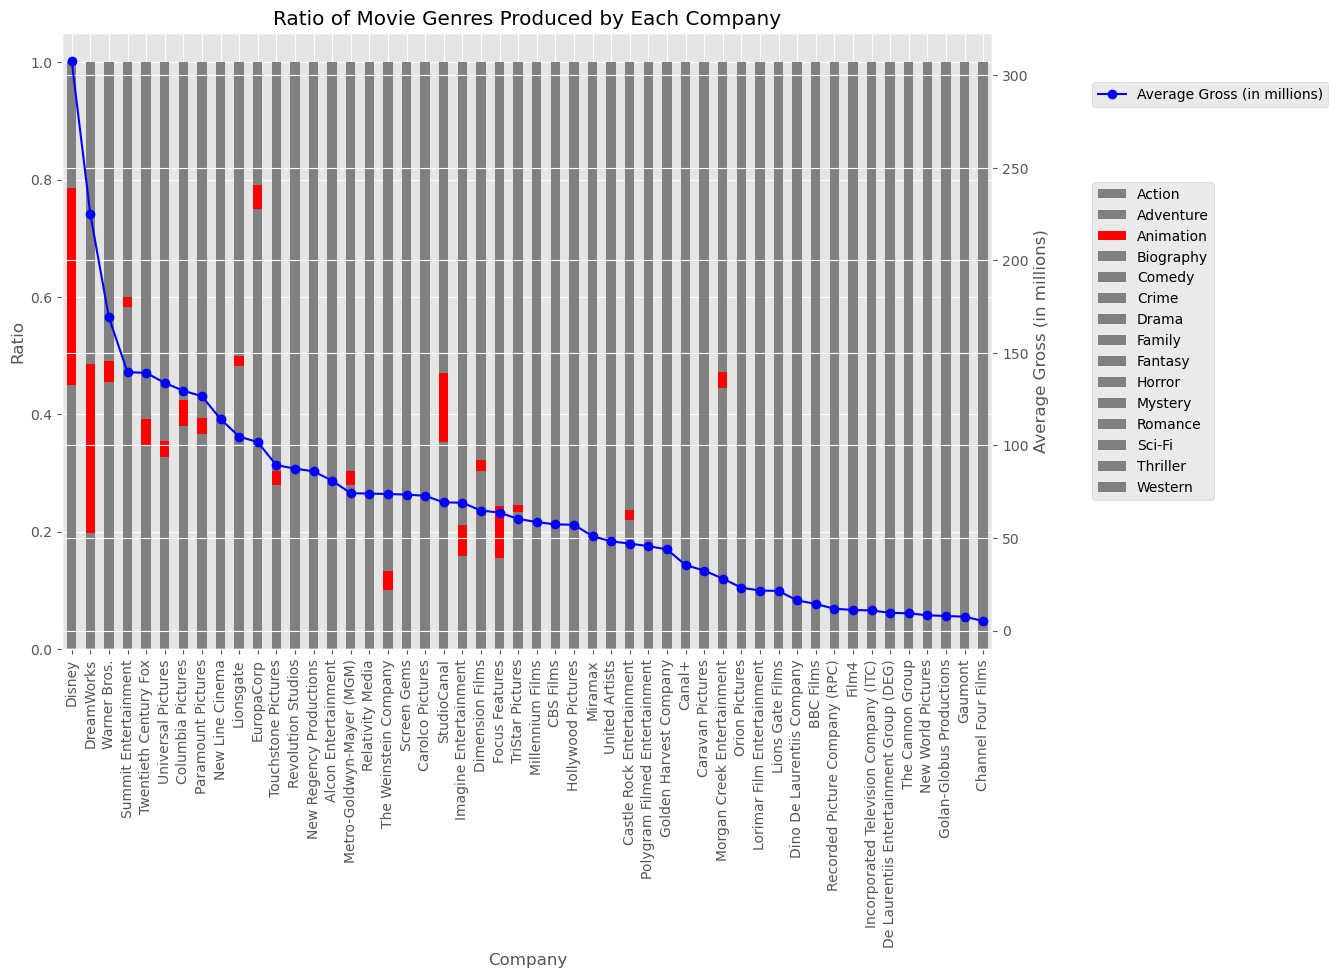

In [33]:

# Sort the company_stats DataFrame by average_gross in descending order
company_stats_sorted = company_stats.sort_values(by='average_gross', ascending=False)

# Get the sorted order of companies by 'average_gross'
sorted_companies = company_stats_sorted['grouped_company']

# Reindex the genre_ratios dataframe according to the sorted order of companies
genre_ratios = genre_ratios.reindex(sorted_companies)

# Define a color map with gray for all genres except for 'Animation'
colors = ['gray' if genre != 'Animation' else 'red' for genre in genre_ratios.columns]

# Plot a stacked bar chart
ax = genre_ratios.plot(kind='bar', stacked=True, figsize=(12,8), color=colors)

# Set the labels and title
plt.ylabel('Ratio')
plt.xlabel('Company')
plt.title('Ratio of Movie Genres Produced by Each Company')

# Create a secondary Y-axis for the 'average_gross' line plot
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), company_stats_sorted['average_gross']/1e6, color='blue', marker='o', label='Average Gross (in millions)')
ax2.set_ylabel('Average Gross (in millions)')

# Adding legend for the line plot
ax2.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))

# Adding legend for the bar plot to the side
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

# Show the plot
plt.show()


In the visualization above, all genres except for animation are greyed out, allowing for a focused analysis on this specific category. A prominent trend that emerges is the concentration of animation productions towards the left side of the chart, which represents a higher gross revenue. 

Disney and DreamWorks, the two frontrunners in this space, derive a substantial portion of their earnings from animated films. This observation leads us to infer that animation is a potent genre for generating profits. The universal appeal of animated films, which captivate audiences ranging from children to adults, is a significant factor in this success. These films often bring to life grand artistic visions that resonate deeply with our imaginations, offering a rich tapestry of stories that appeal to a broad demographic.

Moreover, animated films often hold a nostalgic value, being a cornerstone in the childhood memories of many. This emotional resonance, coupled with the genre's wide-reaching appeal, positions animated films as a reliable avenue for high revenue generation in the film industry.

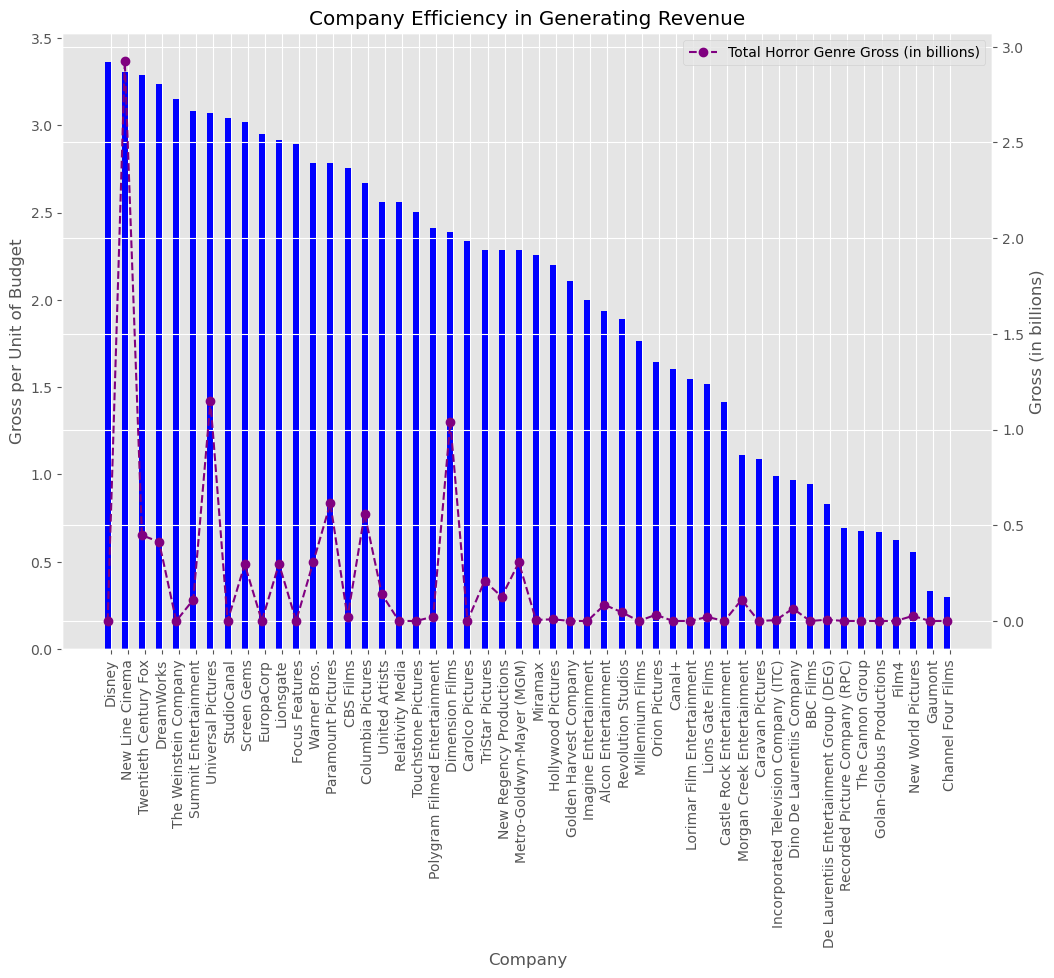

In [41]:
# Calculate the total gross generated from the 'Horror' genre for each company
horror_gross = df_top_50[df_top_50['genre'].str.contains('Horror', case=False, na=False)].groupby('grouped_company')['gross'].sum()

# Merge this data with the company_stats_sorted DataFrame
company_stats_sorted = company_stats_sorted.merge(horror_gross, on='grouped_company', how='left').fillna(0)

# Sort the data by 'gross_per_budget' in descending order
company_stats_sorted = company_stats_sorted.sort_values(by='gross_per_budget', ascending=False)

# Set the positions and width for the bars
pos = list(range(len(company_stats_sorted['grouped_company'])))
bar_width = 0.35

# Set the figure size
plt.figure(figsize=(12,8))

# Create bars for gross_per_budget
plt.bar(pos, company_stats_sorted['gross_per_budget'], bar_width, color='blue', label='Gross per Unit of Budget')

# Set the labels, title, and custom x-axis tick labels
plt.ylabel('Gross per Unit of Budget')
plt.xlabel('Company')
plt.title('Company Efficiency in Generating Revenue')
plt.xticks([p + bar_width/2 for p in pos], company_stats_sorted['grouped_company'], rotation=90)
plt.grid(axis='y')

# Create a secondary Y-axis for the 'Horror' genre gross line plot
ax = plt.gca()
ax2 = ax.twinx()

# Plot the total gross from 'Horror' genre line plot
ax2.plot(pos, company_stats_sorted['gross_y']/1e9, color='purple', marker='o', linestyle='--', label='Total Horror Genre Gross (in billions)')

# Set the labels for the secondary Y-axis
ax2.set_ylabel('Gross (in billions)')

# Adding legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


### New Line Cinema 

Earlier in our analysis, we observed that New Line Cinema boasted significantly higher company efficiency compared to its counterparts. Delving deeper into the company's portfolio, it became apparent that they are the powerhouse behind a slew of blockbuster horror movies including "It," "The Nun," and "The Conjuring," among others. 

These films, characterized by their relatively modest budgets, reaped substantial gross revenues, a testament to their widespread acclaim and popularity. As illustrated in the visualization above, New Line Cinema commands a disproportionately large share of gross revenue from horror movies compared to other industry players. This substantial revenue stream is a pivotal factor propelling their remarkable profit-generating efficiency.

Therefore, for companies aspiring to maximize value derived from their budgets, venturing into the production of high-quality, low-budget horror movies could potentially be a lucrative strategy, with New Line Cinema serving as a compelling case study in this regard.